In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2022 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Advection

Use `metpy.calc.advection`.

This example demonstrates the advection calculation by computing the temperature advection of
the example xarray Dataset and plotting using Matplotlib.

kelvin / second


/var/folders/9w/czmy8vgn76376hx2704_y62w0000gp/T/ipykernel_37512/3945998008.py:10: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  tadv = mpcalc.advection(ds.temperature, ds.uwind, ds.vwind)


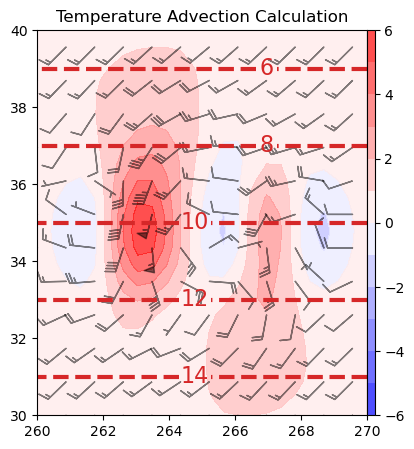

In [3]:
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.cbook import example_data

# load example data
ds = example_data()

# Calculate the temperature advection of the flow
tadv = mpcalc.advection(ds.temperature, ds.uwind, ds.vwind)

# See the units that come back from the advection function
print(tadv.data.units)

# start figure and set axis
fig, ax = plt.subplots(figsize=(5, 5))

# plot isotherms
cs = ax.contour(ds.lon, ds.lat, ds.temperature, range(4, 26, 2), colors='tab:red',
                linestyles='dashed', linewidths=3)
plt.clabel(cs, fmt='%d', fontsize=16)

# plot temperature advection and convert units to Kelvin per 3 hours
cf = ax.contourf(ds.lon, ds.lat, tadv.metpy.convert_units('kelvin/hour') * 3, range(-6, 7, 1),
                 cmap=plt.cm.bwr, alpha=0.75)
plt.colorbar(cf, pad=0, aspect=50)
ax.barbs(ds.lon.values[::2], ds.lat.values[::2],
         ds.uwind[::2, ::2], ds.vwind[::2, ::2],
         color='black', length=6, alpha=0.5)
ax.set(xlim=(260, 270), ylim=(30, 40))
ax.set_title('Temperature Advection Calculation')

plt.show()